In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:

# Generate data
num_samples = 40
np.random.seed(45)

x1 = np.random.uniform(-20, 20, num_samples)
f_x1 = 100 * x1 + 1
eps = np.random.randn(num_samples)
y1 = f_x1 + eps

# Prepare data for gradient descent
X1 = np.column_stack((np.ones(num_samples), x1))  # Add bias term


np.random.seed(45)
num_samples = 40
    
# Generate data
x2 = np.random.uniform(-1, 1, num_samples)
f_x2 = 3*x1 + 4
eps = np.random.randn(num_samples)
y2 = f_x2 + eps

X2 = np.column_stack((np.ones(num_samples), x2))  # Add bias term


In [45]:
# Set hyperparameters
learning_rate = 0.001
epochs = 1000
epsilon = 0.001
momentum = 0.9

# Define Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define gradient function for Mean Squared Error loss
def mse_gradient(X, y, y_pred):
    if isinstance(y, np.ndarray):
        num_samples = len(y)
    else:
        num_samples = 1
    gradient = np.dot(X.T, (y_pred - y)) / num_samples
    return gradient

# Full batch gradient descent with momentum
def full_batch_momentum_gradient_descent(X, y, learning_rate, epochs, loss_fn, grad_fn, epsilon, momentum):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    velocity = np.zeros(num_features)
    loss_history = []
    
    for epoch in range(epochs):
        y_pred = np.dot(X, theta)
        loss = loss_fn(y, y_pred)
        gradient = grad_fn(X, y, y_pred)
        
        # Update velocity with momentum
        velocity = momentum * velocity + learning_rate * gradient
        
        # Update parameters
        theta -= velocity
        
        # Store loss for visualization
        loss_history.append(loss)
        
        # Check convergence
        if epoch > 0 and abs(loss_history[-1] - loss_history[-2]) < epsilon:
            break
    
    return theta, loss_history

# Stochastic gradient descent with momentum
def stochastic_momentum_gradient_descent(X, y, learning_rate, epochs, loss_fn, grad_fn, epsilon, momentum):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    velocity = np.zeros(num_features)
    loss_history = []
    
    for epoch in range(epochs):
        # Shuffle the dataset
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(num_samples):
            xi = X_shuffled[i]
            yi = y_shuffled[i]
            y_pred = np.dot(xi, theta)
            loss = loss_fn(yi, y_pred)
            gradient = grad_fn(xi, yi, y_pred)
            
            # Update velocity with momentum
            velocity = momentum * velocity + learning_rate * gradient
            
            # Update parameters
            theta -= velocity
            
        # Compute average loss for the epoch
        avg_loss = np.mean(loss_fn(y, np.dot(X, theta)))
        loss_history.append(avg_loss)
        
        # Check convergence
        if epoch > 0 and abs(loss_history[-1] - loss_history[-2]) < epsilon:
            break
    
    return theta, loss_history

# Perform full batch gradient descent with momentum
theta_batch1, loss_history_batch1 = full_batch_momentum_gradient_descent(X1, y1, learning_rate, epochs, mse_loss, mse_gradient, epsilon, momentum)

# Perform stochastic gradient descent with momentum
theta_stochastic1, loss_history_stochastic1 = stochastic_momentum_gradient_descent(X1, y1, learning_rate, epochs, mse_loss, mse_gradient, epsilon, momentum)

# Print the final parameters and loss
print("Dataset 1:")
print("Full Batch Gradient Descent with Momentum:")
print("Parameters (theta):", theta_batch1)
print("Final Loss:", loss_history_batch1[-1])
print("\nStochastic Gradient Descent with Momentum:")
print("Parameters (theta):", theta_stochastic1)
print("Final Loss:", loss_history_stochastic1[-1])
print("\n\n")

# Perform full batch gradient descent with momentum
theta_batch2, loss_history_batch2 = full_batch_momentum_gradient_descent(X2, y2, learning_rate, epochs, mse_loss, mse_gradient, epsilon, momentum)

# Perform stochastic gradient descent with momentum
theta_stochastic2, loss_history_stochastic2 = stochastic_momentum_gradient_descent(X2, y2, learning_rate, epochs, mse_loss, mse_gradient, epsilon, momentum)

# Print the final parameters and loss
print("Dataset 2:")
print("Full Batch Gradient Descent with Momentum:")
print("Parameters (theta):", theta_batch2)
print("Final Loss:", loss_history_batch2[-1])
print("\nStochastic Gradient Descent with Momentum:")
print("Parameters (theta):", theta_stochastic2)
print("Final Loss:", loss_history_stochastic2[-1])


Dataset 1:
Full Batch Gradient Descent with Momentum:
Parameters (theta): [ 0.52210738 99.99454276]
Final Loss: 0.8182701377879564

Stochastic Gradient Descent with Momentum:
Parameters (theta): [ 0.95621419 99.98579381]
Final Loss: 0.5961058206021077



Dataset 2:
Full Batch Gradient Descent with Momentum:
Parameters (theta): [ 3.63140271 57.0637155 ]
Final Loss: 2.7355191432156

Stochastic Gradient Descent with Momentum:
Parameters (theta): [ 3.95076899 59.56596045]
Final Loss: 0.6000427140482794


In [54]:

# Perform full batch gradient descent
theta_full_batch, loss_history_full_batch = full_batch_momentum_gradient_descent(X1, y1,learning_rate, epochs, mse_loss, mse_gradient, epsilon, momentum)

# Perform stochastic gradient descent
theta_stochastic, loss_history_stochastic = stochastic_momentum_gradient_descent(X1, y1, learning_rate, epochs, mse_loss, mse_gradient,epsilon, momentum)

print("Full batch gradient descent steps:", len(loss_history_full_batch))
print("Stochastic gradient descent steps:", len(loss_history_stochastic))

Full batch gradient descent steps: 165
Stochastic gradient descent steps: 356


In [53]:

# Perform full batch gradient descent
theta_full_batch, loss_history_full_batch = full_batch_momentum_gradient_descent(X2, y2,learning_rate, epochs, mse_loss, mse_gradient, epsilon, momentum)

# Perform stochastic gradient descent
theta_stochastic, loss_history_stochastic = stochastic_momentum_gradient_descent(X2, y2, learning_rate, epochs, mse_loss, mse_gradient,epsilon, momentum)

print("Full batch gradient descent steps:", len(loss_history_full_batch))
print("Stochastic gradient descent steps:", len(loss_history_stochastic))


Full batch gradient descent steps: 1000
Stochastic gradient descent steps: 49


In [48]:
# Perform full batch gradient descent for Dataset 1
theta_full_batch, loss_history_full_batch = full_batch_momentum_gradient_descent(X1, y1,learning_rate, epochs, mse_loss, mse_gradient, epsilon, momentum)
epochs_full_batch_dataset1 = len(loss_history_full_batch)
print("Full batch gradient descent steps for Dataset 1:", epochs_full_batch_dataset1)

# Perform stochastic gradient descent for Dataset 1
theta_stochastic, loss_history_stochastic = stochastic_momentum_gradient_descent(X1, y1, learning_rate, epochs, mse_loss, mse_gradient,epsilon, momentum)
epochs_stochastic_dataset1 = len(loss_history_stochastic)
print("Stochastic gradient descent steps for Dataset 1:", epochs_stochastic_dataset1)

# Perform full batch gradient descent for Dataset 2
theta_full_batch, loss_history_full_batch = full_batch_momentum_gradient_descent(X2, y2,learning_rate, epochs, mse_loss, mse_gradient, epsilon, momentum)
epochs_full_batch_dataset2 = len(loss_history_full_batch)
print("Full batch gradient descent steps for Dataset 2:", epochs_full_batch_dataset2)

# Perform stochastic gradient descent for Dataset 2
theta_stochastic, loss_history_stochastic = stochastic_momentum_gradient_descent(X2, y2, learning_rate, epochs, mse_loss, mse_gradient,epsilon, momentum)
epochs_stochastic_dataset2 = len(loss_history_stochastic)
print("Stochastic gradient descent steps for Dataset 2:", epochs_stochastic_dataset2)

# Compare the number of epochs for convergence
if epochs_full_batch_dataset1 > epochs_stochastic_dataset1:
    print("Dataset 1: Full-Batch gradient descent takes more epochs to converge.")
else:
    print("Dataset 1: Stochastic gradient descent takes more epochs to converge.")

if epochs_full_batch_dataset2 > epochs_stochastic_dataset2:
    print("Dataset 2: Full-Batch gradient descent takes more epochs to converge.")
else:
    print("Dataset 2: Stochastic gradient descent takes more epochs to converge.")


Full batch gradient descent steps for Dataset 1: 165
Stochastic gradient descent steps for Dataset 1: 342
Full batch gradient descent steps for Dataset 2: 1000
Stochastic gradient descent steps for Dataset 2: 49
Dataset 1: Stochastic gradient descent takes more epochs to converge.
Dataset 2: Full-Batch gradient descent takes more epochs to converge.


In [25]:
# from sklearn.model_selection import KFold

# # Define hyperparameters to search over
# momentum_values = [0.1, 0.5, 0.9, 0.99, 0.6, 0.7, 0.8, 0.85, 0.95]

# # Define number of folds for cross-validation
# k = 5
# kf = KFold(n_splits=k)

# # Perform grid search with k-fold cross-validation
# best_momentum = None
# best_avg_loss = float('inf')

# for momentum in momentum_values:
#     avg_loss = 0
    
#     for train_index, val_index in kf.split(X1):
#         X_train, X_val = X1[train_index], X1[val_index]
#         y_train, y_val = y1[train_index], y1[val_index]
        
#         # Perform gradient descent with momentum on the training set
#         theta, _ = full_batch_momentum_gradient_descent(X_train, y_train, learning_rate, epochs, mse_loss, mse_gradient, epsilon, momentum)
        
#         # Compute loss on the validation set
#         y_val_pred = np.dot(X_val, theta)
#         val_loss = mse_loss(y_val, y_val_pred)
        
#         avg_loss += val_loss / k
    
#     # Check if current momentum gives better average loss
#     if avg_loss < best_avg_loss:
#         best_avg_loss = avg_loss
#         best_momentum = momentum

# print("Best momentum:", best_momentum)

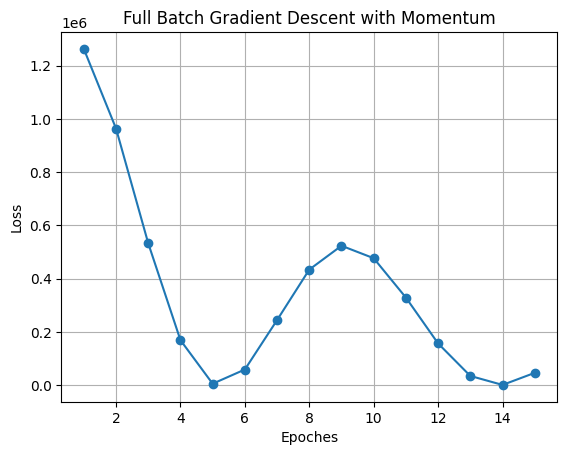

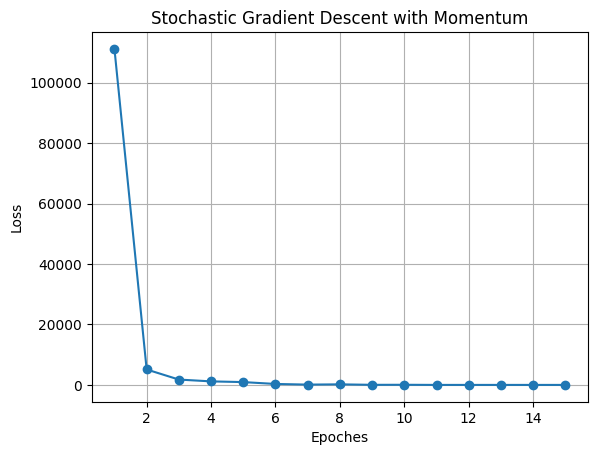

In [49]:
import matplotlib.pyplot as plt

# Define a function to plot the convergence process
def plot_convergence(loss_history, title):
    plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Perform full batch gradient descent with momentum for 15 steps
theta_batch, loss_history_batch = full_batch_momentum_gradient_descent(X1, y1, learning_rate, 15, mse_loss, mse_gradient, epsilon, momentum)
plot_convergence(loss_history_batch, 'Full Batch Gradient Descent with Momentum')

# Perform stochastic gradient descent with momentum for 15 steps
theta_stochastic, loss_history_stochastic = stochastic_momentum_gradient_descent(X1, y1, learning_rate, 15, mse_loss, mse_gradient, epsilon, momentum)
plot_convergence(loss_history_stochastic, 'Stochastic Gradient Descent with Momentum')


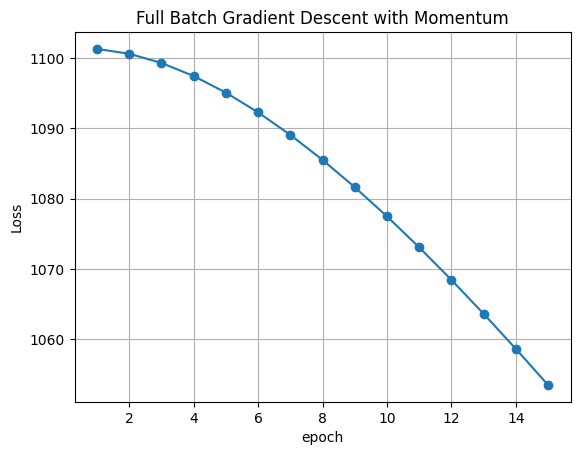

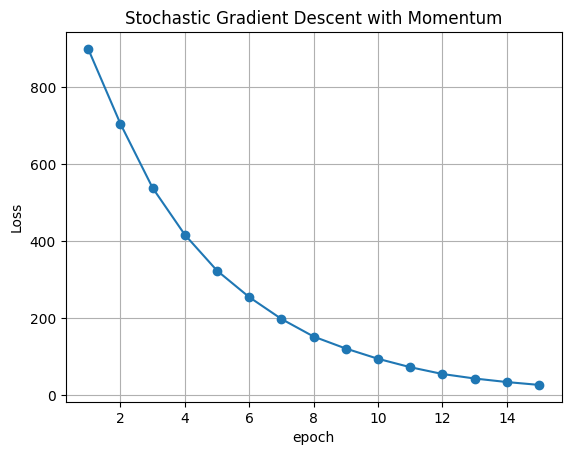

In [50]:
import matplotlib.pyplot as plt

# Define a function to plot the convergence process
def plot_convergence(loss_history, title):
    plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Perform full batch gradient descent with momentum for 15 steps
theta_batch, loss_history_batch = full_batch_momentum_gradient_descent(X2, y2, learning_rate, 15, mse_loss, mse_gradient, epsilon, momentum)
plot_convergence(loss_history_batch, 'Full Batch Gradient Descent with Momentum')

# Perform stochastic gradient descent with momentum for 15 steps
theta_stochastic, loss_history_stochastic = stochastic_momentum_gradient_descent(X2, y2, learning_rate, 15, mse_loss, mse_gradient, epsilon, momentum)
plot_convergence(loss_history_stochastic, 'Stochastic Gradient Descent with Momentum')


In [51]:
# Define Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define gradient function for Mean Squared Error loss
def mse_gradient(X, y, y_pred):
    if isinstance(y, np.ndarray):
        num_samples = len(y)
    else:
        num_samples = 1
    gradient = np.dot(X.T, (y_pred - y)) / num_samples
    return gradient

# Full batch gradient descent function
def full_batch_gradient_descent(X, y, learning_rate, epochs, loss_fn, grad_fn, epsilon):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    loss_history = []
    
    for epoch in range(epochs):
        y_pred = np.dot(X, theta)
        loss = loss_fn(y, y_pred)
        gradient = grad_fn(X, y, y_pred)
        theta -= learning_rate * gradient
        
        # Store loss for visualization
        loss_history.append(loss)
        
        # Check convergence
        if epoch > 0 and abs(loss_history[-1] - loss_history[-2]) < epsilon:
            break
    
    return theta, loss_history

# Stochastic gradient descent function
def stochastic_gradient_descent(X, y, learning_rate, epochs, loss_fn, grad_fn, epsilon):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    loss_history = []
    
    for epoch in range(epochs):
        # Shuffle the dataset
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(num_samples):
            xi = X_shuffled[i]
            yi = y_shuffled[i]
            y_pred = np.dot(xi, theta)
            loss = loss_fn(yi, y_pred)
            gradient = grad_fn(xi, yi, y_pred)
            theta -= learning_rate * gradient
            
        # Compute average loss for the epoch
        avg_loss = np.mean(loss_fn(y, np.dot(X, theta)))
        loss_history.append(avg_loss)
        
        # Check convergence
        if epoch > 0 and abs(loss_history[-1] - loss_history[-2]) < epsilon:
            break
    
    return theta, loss_history

In [52]:
# Define a function to calculate the average number of steps taken for convergence
def average_steps_to_converge(X, y, learning_rate, epochs, loss_fn, grad_fn, epsilon, num_simulations):
    num_steps_momentum_batch = 0
    num_steps_momentum_stochastic = 0
    num_steps_vanilla = 0
    num_steps_sgd = 0

    
    for _ in range(num_simulations):
        # Full batch gradient descent with momentum
        _, loss_history_batch = full_batch_momentum_gradient_descent(X, y, learning_rate, epochs, loss_fn, grad_fn, epsilon, 0.9)
        num_steps_momentum_batch += len(loss_history_batch)
        
        # Stochastic gradient descent with momentum
        _, loss_history_stochastic = stochastic_momentum_gradient_descent(X, y, learning_rate, epochs, loss_fn, grad_fn, epsilon, 0.9)
        num_steps_momentum_stochastic += len(loss_history_stochastic)
        
        # Vanilla gradient descent
        _, loss_history_vanilla = full_batch_gradient_descent(X, y, learning_rate, epochs, loss_fn, grad_fn, epsilon)
        num_steps_vanilla += len(loss_history_vanilla)

        _, loss_history_sgd = stochastic_gradient_descent(X, y, learning_rate, epochs, loss_fn, grad_fn, epsilon)
        num_steps_sgd += len(loss_history_sgd)
    
    avg_steps_momentum_batch = num_steps_momentum_batch / num_simulations
    avg_steps_momentum_stochastic = num_steps_momentum_stochastic / num_simulations
    avg_steps_vanilla = num_steps_vanilla / num_simulations
    avg_steps_sgd = num_steps_sgd / num_simulations

    
    return avg_steps_momentum_batch, avg_steps_momentum_stochastic, avg_steps_vanilla, avg_steps_sgd

# Set parameters
learning_rate = 0.001
epochs = 1000
epsilon = 0.001
num_simulations = 100
momentum = 0.9

# Perform simulations to calculate average number of steps
avg_steps_momentum_batch1, avg_steps_momentum_stochastic1, avg_steps_vanilla1, avg_steps_sgd1 = average_steps_to_converge(X1, y1, learning_rate, epochs, mse_loss, mse_gradient, epsilon, num_simulations)

# Print results
print("Dataset 1:")
print("Average number of steps taken to converge:")
print("Gradient Descent with Momentum (Full Batch):", avg_steps_momentum_batch1)
print("Gradient Descent with Momentum (Stochastic):", avg_steps_momentum_stochastic1)
print("Full-Batch Gradient Descent(without Momentum):", avg_steps_vanilla1)
print("Stochastic Gradient Descent(without Momentum):", avg_steps_sgd1)
print("\n\n")

avg_steps_momentum_batch2, avg_steps_momentum_stochastic2, avg_steps_vanilla2, avg_steps_sgd2 = average_steps_to_converge(X2, y2, learning_rate, epochs, mse_loss, mse_gradient, epsilon, num_simulations)

# Print results
print("Dataset 2:")
print("Average number of steps taken to converge:")
print("Gradient Descent with Momentum (Full Batch):", avg_steps_momentum_batch2)
print("Gradient Descent with Momentum (Stochastic):", avg_steps_momentum_stochastic2)
print("Full-Batch Gradient Descent(without Momentum):", avg_steps_vanilla2)
print("Stochastic Gradient Descent(without Momentum):", avg_steps_sgd2)

Dataset 1:
Average number of steps taken to converge:
Gradient Descent with Momentum (Full Batch): 165.0
Gradient Descent with Momentum (Stochastic): 320.32
Full-Batch Gradient Descent(without Momentum): 1000.0
Stochastic Gradient Descent(without Momentum): 63.01



Dataset 2:
Average number of steps taken to converge:
Gradient Descent with Momentum (Full Batch): 1000.0
Gradient Descent with Momentum (Stochastic): 49.16
Full-Batch Gradient Descent(without Momentum): 1000.0
Stochastic Gradient Descent(without Momentum): 417.86


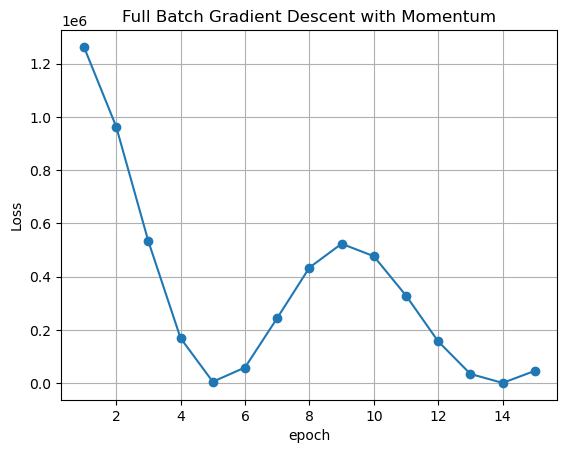

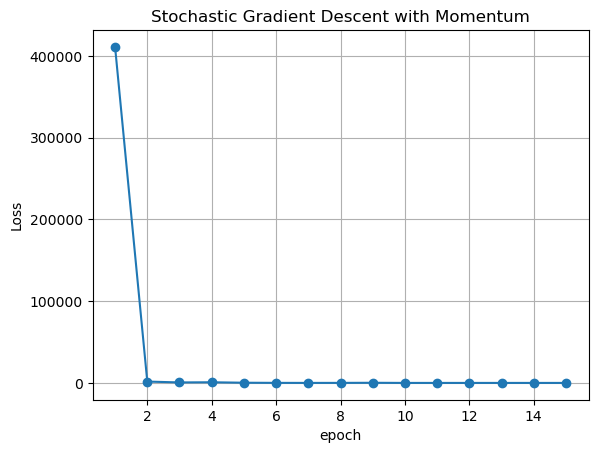

In [ ]:
# Visualize for 15 epochs of convergence for Dataset 1 using contour plot

# Define a function to plot the convergence process
def plot_convergence(loss_history, title):
    plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Perform full batch gradient descent with momentum for 15 steps
theta_batch, loss_history_batch = full_batch_momentum_gradient_descent(X1, y1, learning_rate, 15, mse_loss, mse_gradient, epsilon, momentum)
plot_convergence(loss_history_batch, 'Full Batch Gradient Descent with Momentum')

# Perform stochastic gradient descent with momentum for 15 steps
theta_stochastic, loss_history_stochastic = stochastic_momentum_gradient_descent(X1, y1, learning_rate, 15, mse_loss, mse_gradient, epsilon, momentum)
plot_convergence(loss_history_stochastic, 'Stochastic Gradient Descent with Momentum')


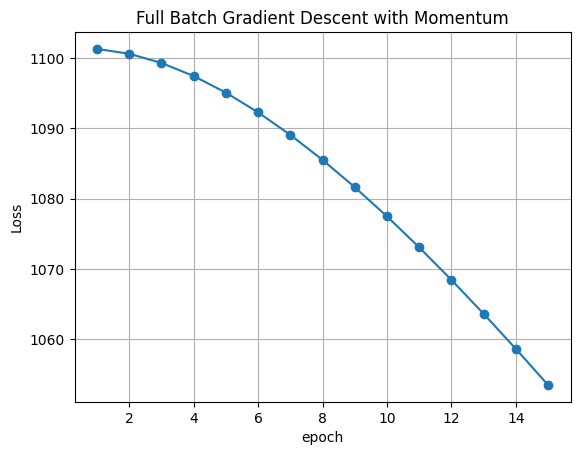

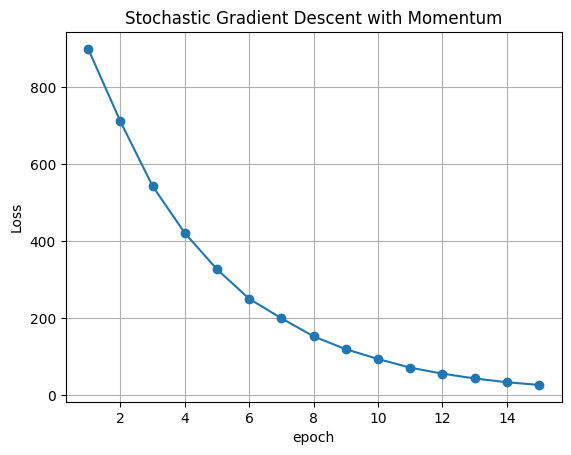

In [58]:
# Visualize for 15 epochs of convergence for Dataset 2 using contour plot

# Define a function to plot the convergence process
def plot_convergence(loss_history, title):
    plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Perform full batch gradient descent with momentum for 15 steps
theta_batch, loss_history_batch = full_batch_momentum_gradient_descent(X2, y2, learning_rate,15, mse_loss, mse_gradient, epsilon, 0.9)
plot_convergence(loss_history_batch, 'Full Batch Gradient Descent with Momentum')

# Perform stochastic gradient descent with momentum for 15 steps
theta_stochastic, loss_history_stochastic = stochastic_momentum_gradient_descent(X2, y2, learning_rate, 15, mse_loss, mse_gradient, epsilon, 0.9)
plot_convergence(loss_history_stochastic, 'Stochastic Gradient Descent with Momentum')


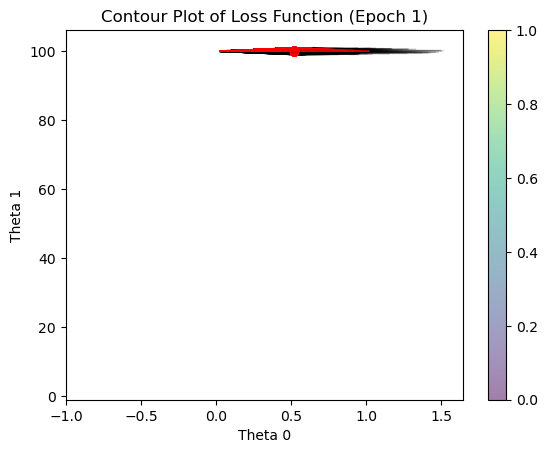

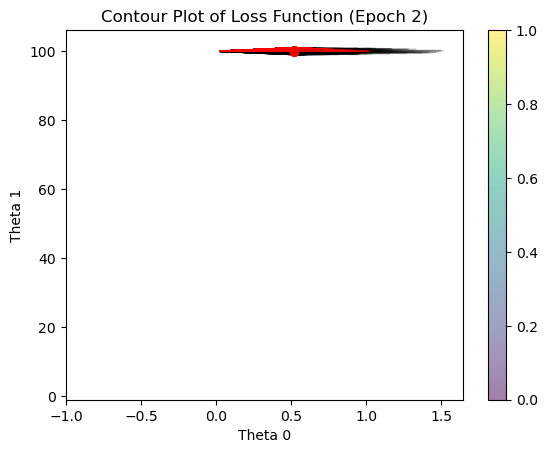

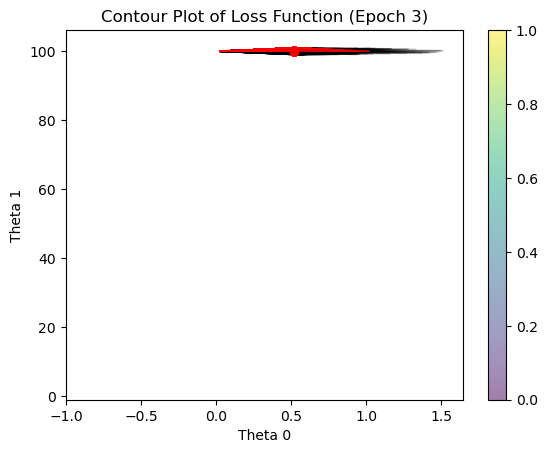

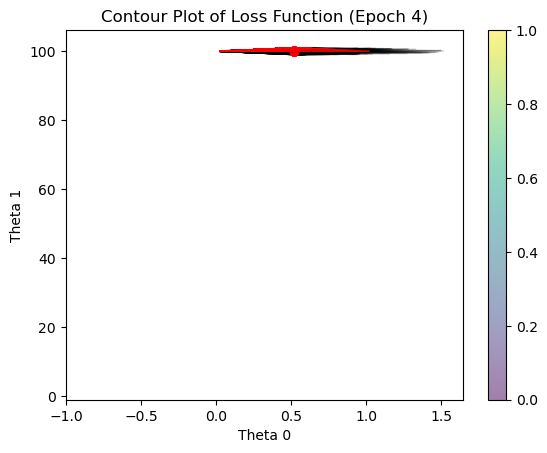

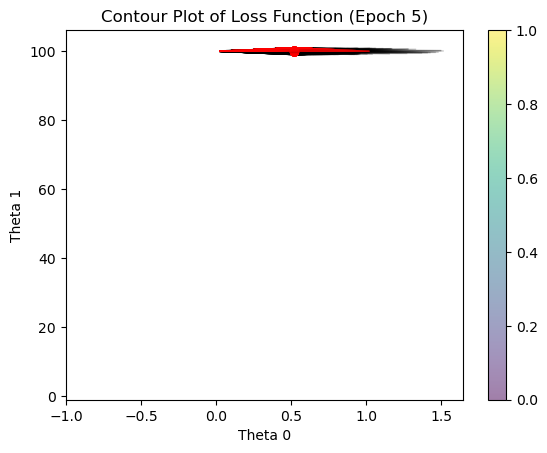

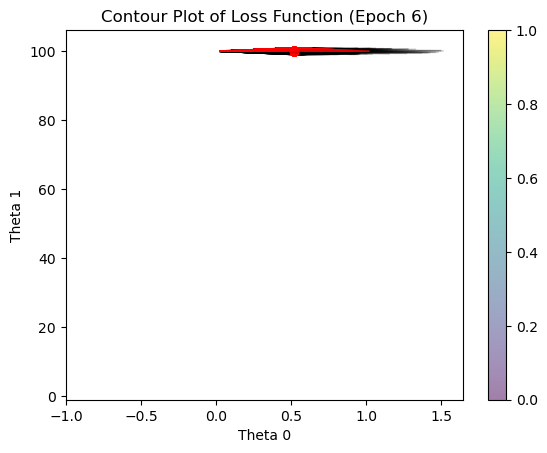

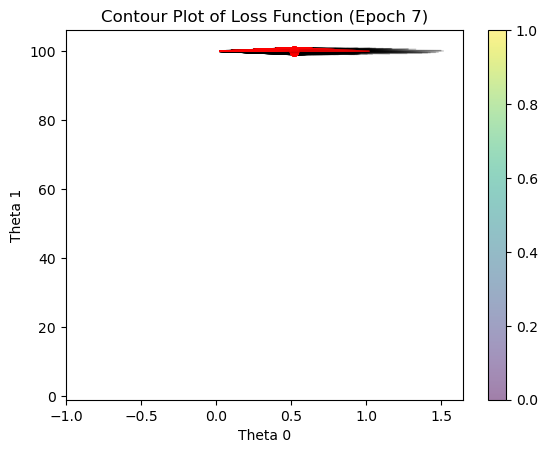

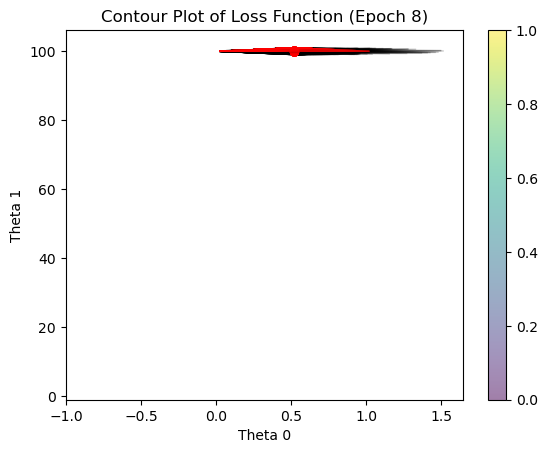

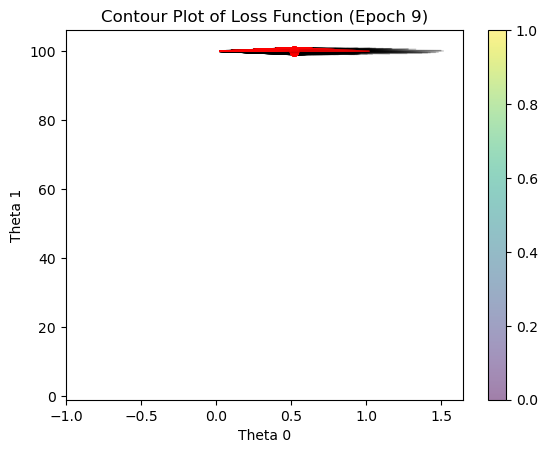

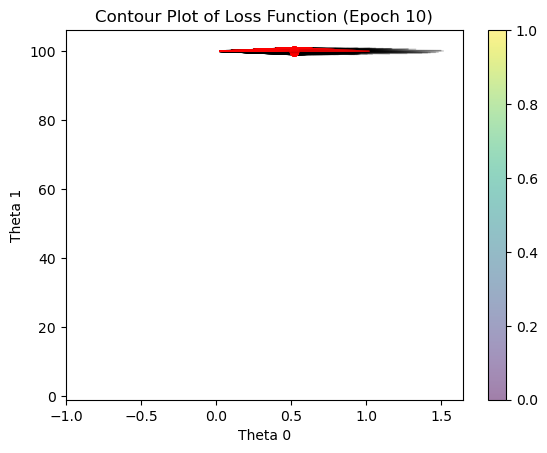

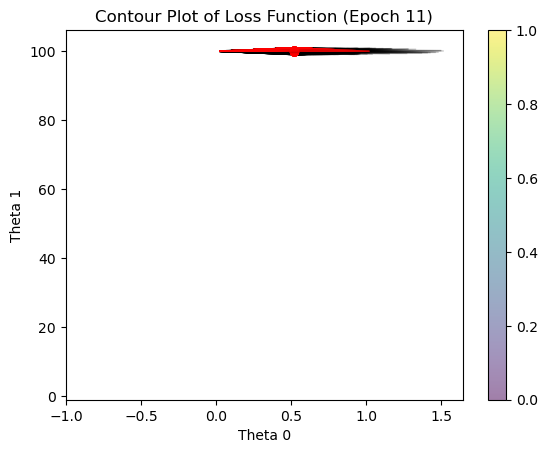

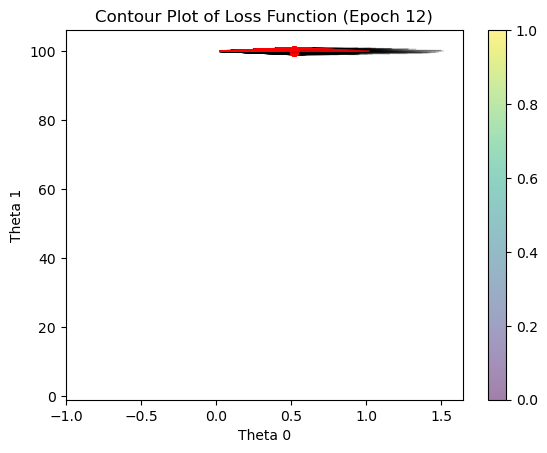

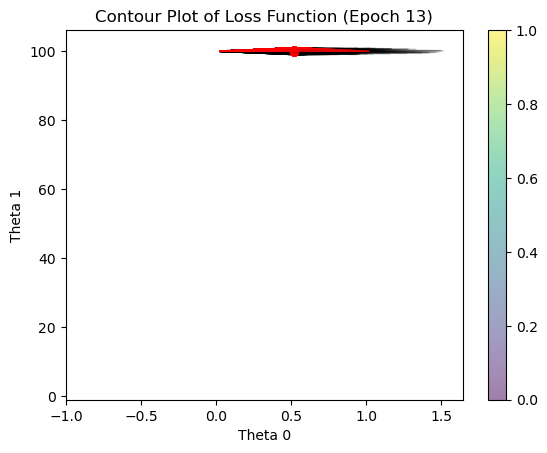

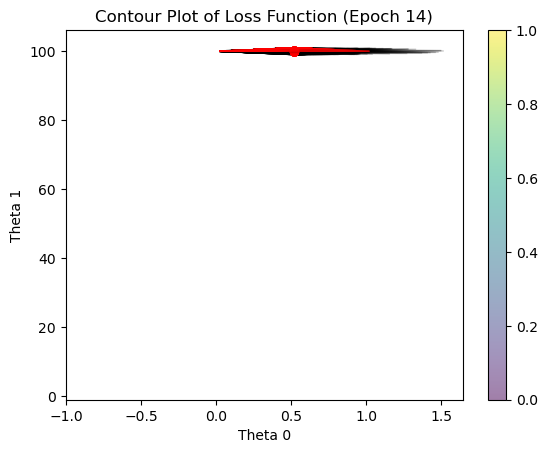

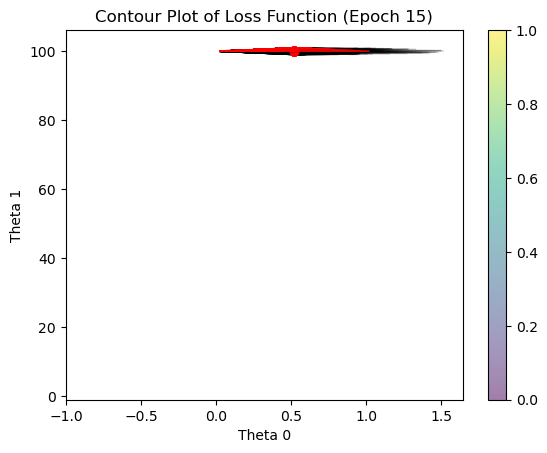

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1
num_samples = 40
np.random.seed(45)

x = np.random.uniform(-20, 20, num_samples)
f_x = 100 * x + 1
eps = np.random.randn(num_samples)
y = f_x + eps

X = np.column_stack((np.ones(num_samples), x))  # Add bias term

# Set hyperparameters
learning_rate = 0.001
epochs = 1000
epsilon = 0.001
momentum = 0.9

# Define Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define gradient function for Mean Squared Error loss
def mse_gradient(X, y, y_pred):
    if isinstance(y, np.ndarray):
        num_samples = len(y)
    else:
        num_samples = 1
    gradient = np.dot(X.T, (y_pred - y)) / num_samples
    return gradient

# Full batch gradient descent with momentum
def full_batch_momentum_gradient_descent(X, y, learning_rate, epochs, loss_fn, grad_fn, epsilon, momentum):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    velocity = np.zeros(num_features)
    loss_history = []
    theta_history = []
    velocity_history = []
    
    for epoch in range(epochs):
        y_pred = np.dot(X, theta)
        loss = loss_fn(y, y_pred)
        gradient = grad_fn(X, y, y_pred)
        
        # Update velocity with momentum
        velocity = momentum * velocity + learning_rate * gradient
        
        # Update parameters
        theta -= velocity
        
        # Store history for visualization
        theta_history.append(theta)
        velocity_history.append(velocity)
        loss_history.append(loss)
        
        # Check convergence
        if epoch > 0 and abs(loss_history[-1] - loss_history[-2]) < epsilon:
            break
    
    return theta, loss_history, theta_history, velocity_history

# Perform full batch gradient descent with momentum
theta, loss_history, theta_history, velocity_history = full_batch_momentum_gradient_descent(X, y, learning_rate, epochs, mse_loss, mse_gradient, epsilon, momentum)

# Contour plot
def contour_plot(X, y, theta_history, velocity_history, loss_history):
    for epoch in range(15):
        plt.figure()
        # Generate meshgrid for visualization
        # theta0_vals = np.linspace(-30, 30, 100)
        # theta1_vals = np.linspace(-30, 30, 100)
        theta0_vals = np.linspace(-1, 1, 100)
        theta1_vals = np.linspace(-1, 1, 100)
        theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)
        Z = np.zeros_like(theta0)
        
        # Calculate loss for each point on the grid
        for i in range(len(theta0_vals)):
            for j in range(len(theta1_vals)):
                theta = np.array([theta0_vals[i], theta1_vals[j]])
                y_pred = np.dot(X, theta)
                Z[i, j] = mse_loss(y, y_pred)
        
        # Plot contours
        plt.contour(theta0, theta1, Z, levels=np.logspace(-2, 3, 20), cmap='jet')
        plt.xlabel('Theta 0')
        plt.ylabel('Theta 1')
        
        # Plot gradient, current value of theta, and momentum vectors
        for i in range(len(theta_history)):
            plt.arrow(theta_history[i][0], theta_history[i][1], -learning_rate * velocity_history[i][0],
                      -learning_rate * velocity_history[i][1], head_width=1, head_length=1, fc='k', ec='k', alpha=0.2)
            plt.arrow(theta_history[i][0], theta_history[i][1], theta_history[i][0] - theta_history[i - 1][0],
                      theta_history[i][1] - theta_history[i - 1][1], head_width=1, head_length=1, fc='r', ec='r', alpha=0.5)
            plt.scatter(theta_history[i][0], theta_history[i][1], color='r', alpha=0.5)
        
        plt.colorbar()
        plt.title(f'Contour Plot of Loss Function (Epoch {epoch + 1})')
        plt.show()

# Visualize contour plot with vectors for each epoch
contour_plot(X, y, theta_history, velocity_history, loss_history)

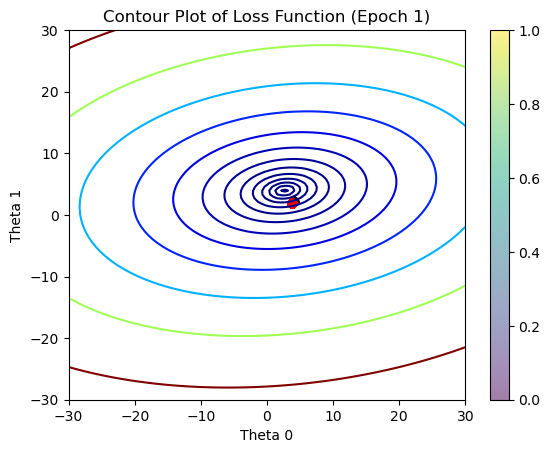

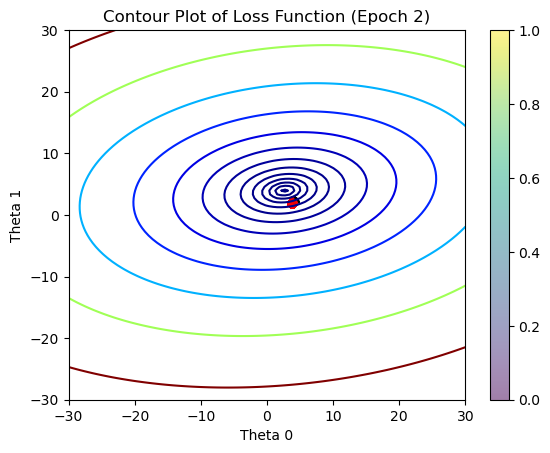

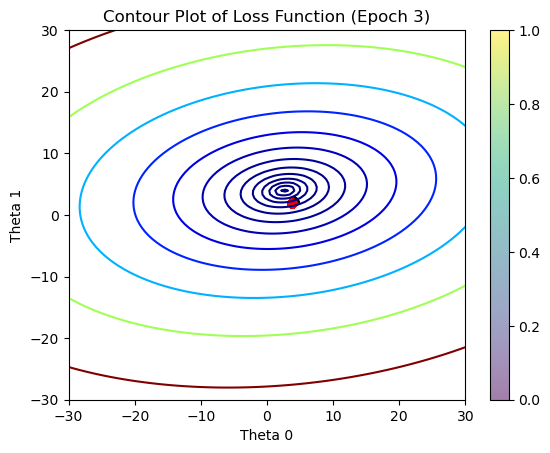

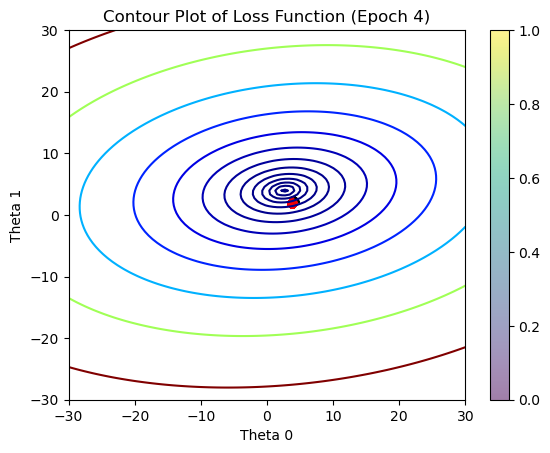

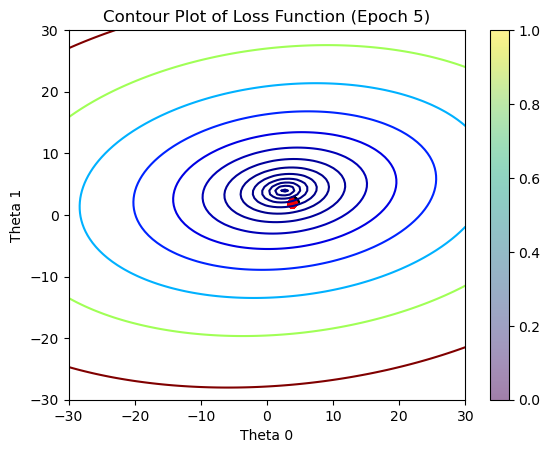

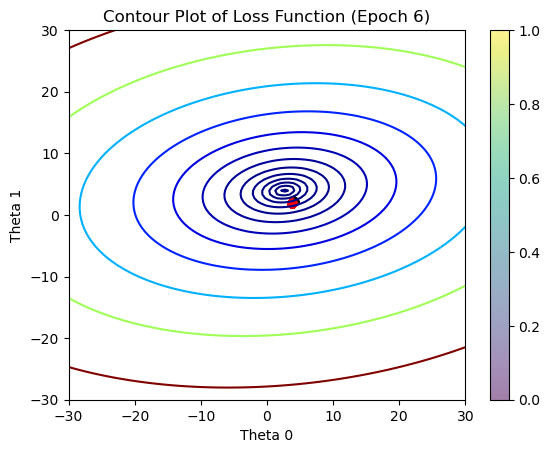

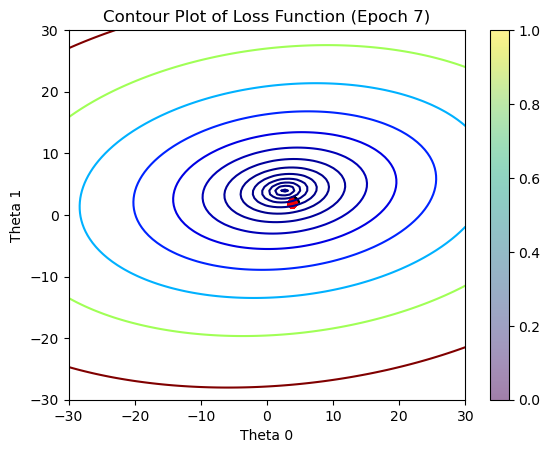

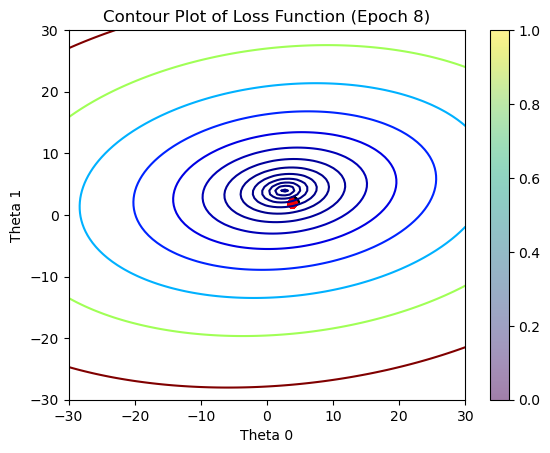

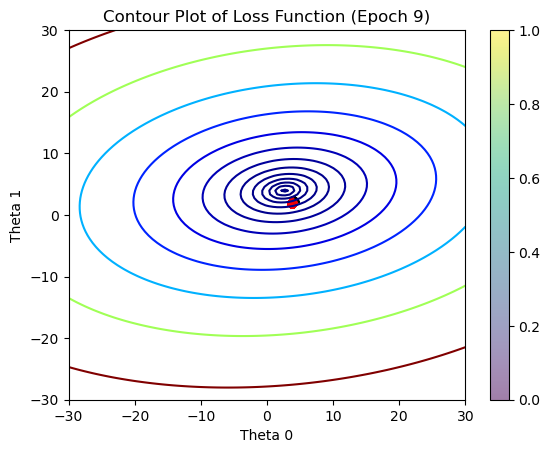

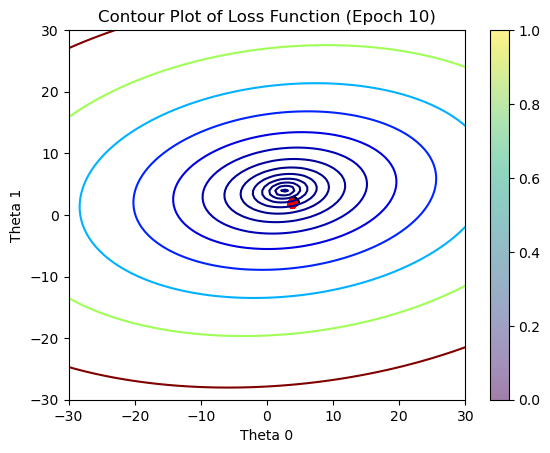

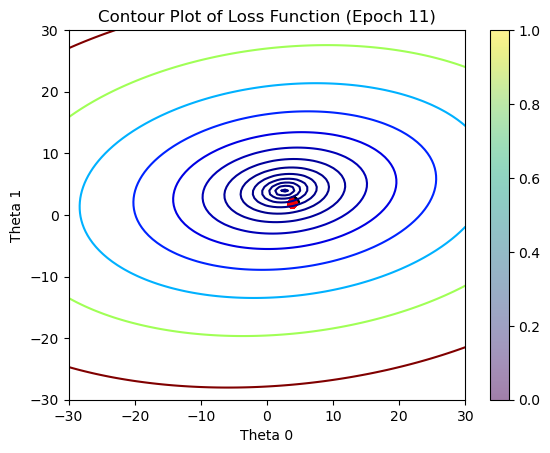

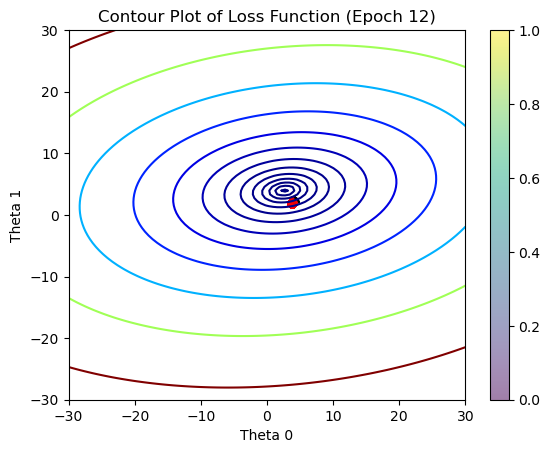

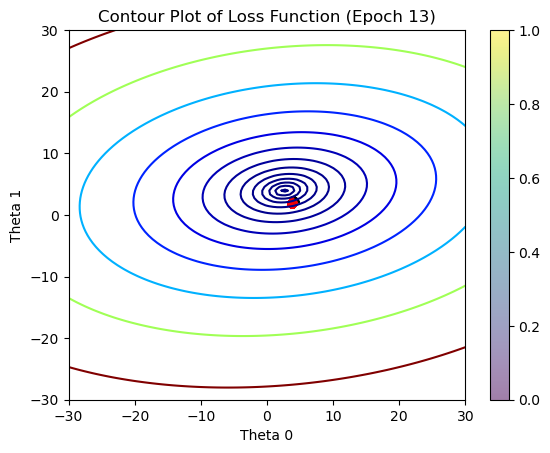

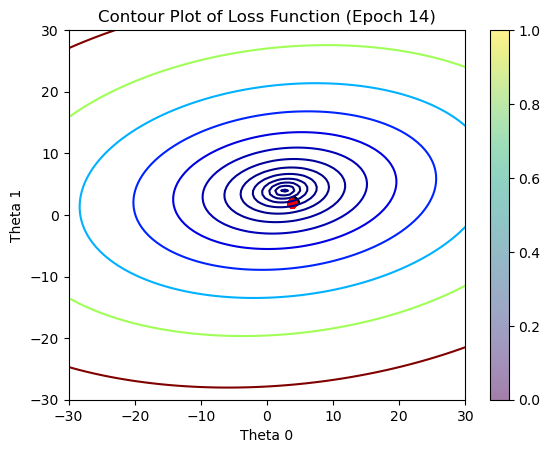

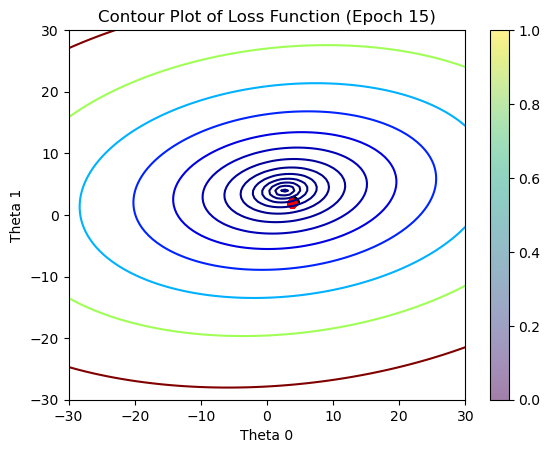

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset 2
np.random.seed(45)
num_samples = 40
x = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x + 4
eps = np.random.randn(num_samples)
y = f_x + eps

X = np.column_stack((np.ones(num_samples), x))  # Add bias term


# Set hyperparameters
learning_rate = 0.001
epochs = 1000
epsilon = 0.001
momentum = 0.9

# Define Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define gradient function for Mean Squared Error loss
def mse_gradient(X, y, y_pred):
    if isinstance(y, np.ndarray):
        num_samples = len(y)
    else:
        num_samples = 1
    gradient = np.dot(X.T, (y_pred - y)) / num_samples
    return gradient

# Full batch gradient descent with momentum
def full_batch_momentum_gradient_descent(X, y, learning_rate, epochs, loss_fn, grad_fn, epsilon, momentum):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    velocity = np.zeros(num_features)
    loss_history = []
    theta_history = []
    velocity_history = []
    
    for epoch in range(epochs):
        y_pred = np.dot(X, theta)
        loss = loss_fn(y, y_pred)
        gradient = grad_fn(X, y, y_pred)
        
        # Update velocity with momentum
        velocity = momentum * velocity + learning_rate * gradient
        
        # Update parameters
        theta -= velocity
        
        # Store history for visualization
        theta_history.append(theta)
        velocity_history.append(velocity)
        loss_history.append(loss)
        
        # Check convergence
        if epoch > 0 and abs(loss_history[-1] - loss_history[-2]) < epsilon:
            break
    
    return theta, loss_history, theta_history, velocity_history

# Perform full batch gradient descent with momentum
theta, loss_history, theta_history, velocity_history = full_batch_momentum_gradient_descent(X, y, learning_rate, epochs, mse_loss, mse_gradient, epsilon, momentum)

# Contour plot
def contour_plot(X, y, theta_history, velocity_history, loss_history):
    for epoch in range(15):
        plt.figure()
        # Generate meshgrid for visualization
        theta0_vals = np.linspace(-30, 30, 100)
        theta1_vals = np.linspace(-30, 30, 100)
        theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)
        Z = np.zeros_like(theta0)
        
        # Calculate loss for each point on the grid
        for i in range(len(theta0_vals)):
            for j in range(len(theta1_vals)):
                theta = np.array([theta0_vals[i], theta1_vals[j]])
                y_pred = np.dot(X, theta)
                Z[i, j] = mse_loss(y, y_pred)
        
        # Plot contours
        plt.contour(theta0, theta1, Z, levels=np.logspace(-2, 3, 20), cmap='jet')
        plt.xlabel('Theta 0')
        plt.ylabel('Theta 1')
        
        # Plot gradient, current value of theta, and momentum vectors
        for i in range(len(theta_history)):
            plt.arrow(theta_history[i][0], theta_history[i][1], -learning_rate * velocity_history[i][0],
                      -learning_rate * velocity_history[i][1], head_width=1, head_length=1, fc='k', ec='k', alpha=0.2)
            plt.arrow(theta_history[i][0], theta_history[i][1], theta_history[i][0] - theta_history[i - 1][0],
                      theta_history[i][1] - theta_history[i - 1][1], head_width=1, head_length=1, fc='r', ec='r', alpha=0.5)
            plt.scatter(theta_history[i][0], theta_history[i][1], color='r', alpha=0.5)
        
        plt.colorbar()
        plt.title(f'Contour Plot of Loss Function (Epoch {epoch + 1})')
        plt.show()

# Visualize contour plot with vectors for each epoch
contour_plot(X, y, theta_history, velocity_history, loss_history)